### Extraire les names des labels

In [1]:
import pandas as pd
def labelsToName(df2):
    df2["label_names"]=df2["labels"].apply(\
        lambda ligne: #fct anonyme \
                    "no_labels" if len(ligne) == 0 # le if \
                     else ",".join(map( #on parcourt la list de dico \
                              lambda dico: dico["name"] #on prend le name dans le dico \
                             ,ligne))\
                  )

### Importer les données de plusieurs pages

In [2]:
 def importerEtTraiterLesIssusLabels(maxi=10,page=30):
        a_concat=[]
        giveMePage = lambda i: pd.read_json("https://api.github.com/repos/Microsoft/vscode/issues?per_page=%d&page=%d" % (page,i))
        dfA = giveMePage(1)
        i=0
        while  dfA.size > 0 and i<maxi:
            labelsToName(dfA)
            a_concat.append(dfA)
            dfA = giveMePage(1)
            i+=1
    #print(len(a_concat))
        pdd=pd.concat(a_concat,ignore_index=True)
       # pdd["isBug"]=d["label_names"].str.contains("bug",regex=True)
        #pdd["isFR"]=d["label_names"].str.contains("feature\-request",regex=True)
        #pdd["isOther"] = ~d["label_names"].str.contains("bug|feature\-request")
        return pdd

In [3]:
 d=importerEtTraiterLesIssusLabels(maxi=10,page=30)

In [4]:
d

,assignee,assignees,author_association,body,closed_at,comments,comments_url,created_at,events_url,html_url,...,node_id,number,pull_request,repository_url,state,title,updated_at,url,user,label_names
0,"{'login': 'Tyriar', 'id': 2193314, 'node_id': ...","[{'login': 'Tyriar', 'id': 2193314, 'node_id':...",NONE,<!-- Please search existing issues to avoid cr...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 22:25:13,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57782,...,MDU6SXNzdWUzNTYzMTg4NjI=,57782,NaN,https://api.github.com/repos/Microsoft/vscode,open,Embedded terminal can't handle custom colors,2018-09-02 22:28:56,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'Serenitor', 'id': 23386940, 'node_i...",integrated-terminal
1,"{'login': 'Tyriar', 'id': 2193314, 'node_id': ...","[{'login': 'Tyriar', 'id': 2193314, 'node_id':...",NONE,<!-- Use Help > Report Issue to prefill these....,NaT,1,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 16:16:45,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57781,...,MDU6SXNzdWUzNTYyOTQ2MTI=,57781,NaN,https://api.github.com/repos/Microsoft/vscode,open,Caret position issues in terminal,2018-09-02 16:17:06,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'Luberen', 'id': 26616056, 'node_id'...",integrated-terminal
2,None,[],NONE,"I'm quite used to a single tab bar, even for m...",NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 16:16:20,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57780,...,MDU6SXNzdWUzNTYyOTQ1ODE=,57780,NaN,https://api.github.com/repos/Microsoft/vscode,open,"Single tab bar per multiple splits, change foc...",2018-09-02 16:16:20,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'naufraghi', 'id': 106029, 'node_id'...",no_labels
3,None,[],NONE,<!-- Please search existing issues to avoid cr...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 15:21:29,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57779,...,MDU6SXNzdWUzNTYyOTA3Mjg=,57779,NaN,https://api.github.com/repos/Microsoft/vscode,open,3septiembre,2018-09-02 15:21:49,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'TIVelez', 'id': 28053684, 'node_id'...",extensions
4,"{'login': 'Tyriar', 'id': 2193314, 'node_id': ...","[{'login': 'Tyriar', 'id': 2193314, 'node_id':...",NONE,Issue Type: <b>Bug</b>\r\n\r\nAfter updating f...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 15:19:27,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57778,...,MDU6SXNzdWUzNTYyOTA1NzI=,57778,NaN,https://api.github.com/repos/Microsoft/vscode,open,Editor locks up after about 1 hour of usage,2018-09-02 15:22:41,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'TheColorRed', 'id': 1571806, 'node_...",integrated-terminal
5,"{'login': 'bpasero', 'id': 900690, 'node_id': ...","[{'login': 'bpasero', 'id': 900690, 'node_id':...",NONE,<!-- Please search existing issues to avoid cr...,NaT,2,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 14:57:04,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57777,...,MDU6SXNzdWUzNTYyODg4ODk=,57777,NaN,https://api.github.com/repos/Microsoft/vscode,open,Whole file content erased when it failed to sa...,2018-09-02 15:43:09,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'vasu-msbits', 'id': 1105258, 'node_...",needs more info
6,None,[],NONE,<!-- Please search existing issues to avoid cr...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 14:41:31,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57776,...,MDU6SXNzdWUzNTYyODc3MTg=,57776,NaN,https://api.github.com/repos/Microsoft/vscode,open,Segmentation fault in Ubuntu Cosmic (18.

### Extraire quelques variables interessantes

In [6]:
col = ['label_names','body']
dcol = d[col]
dcol

,label_names,body
0,integrated-terminal,<!-- Please search existing issues to avoid cr...
1,integrated-terminal,<!-- Use Help > Report Issue to prefill these....
2,no_labels,"I'm quite used to a single tab bar, even for m..."
3,extensions,<!-- Please search existing issues to avoid cr...
4,integrated-terminal,Issue Type: <b>Bug</b>\r\n\r\nAfter updating f...
5,needs more info,<!-- Please search existing issues to avoid cr...
6,install-update,<!-- Please search existing issues to avoid cr...
7,"editor,editor-find",- VSCode Version: Version: 1.26.1 (Commit: 493...
8,no_labels,Issue Type: <b>Suspected Bug</b>\r\n\r\nI had ...
9,no_labels,Issue Type: <b>Bug</b>\r\n\r\nSome menu items ...


### Encoder la variable label_names comme un entier

In [7]:
from io import StringIO
col = ['label_names', 'body']
d = d[col]
d.columns = ['label_names', 'body']
d['category_id'] = d['label_names'].factorize()[0]
category_id_d = d[['label_names', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_d.values)
id_to_category = dict(category_id_d[['category_id', 'label_names']].values)
d.head()

c:\users\thouderth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,label_names,body,category_id
0,integrated-terminal,<!-- Please search existing issues to avoid cr...,0
1,integrated-terminal,<!-- Use Help > Report Issue to prefill these....,0
2,no_labels,"I'm quite used to a single tab bar, even for m...",1
3,extensions,<!-- Please search existing issues to avoid cr...,2
4,integrated-terminal,Issue Type: <b>Bug</b>\r\n\r\nAfter updating f...,0


### Histogramme de label_names

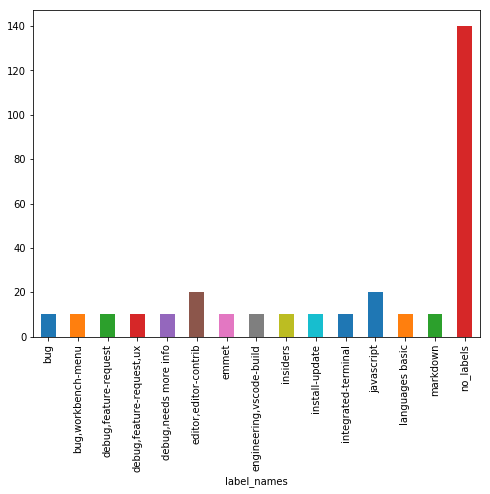

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
d.groupby('label_names').body.count().plot.bar(ylim=0)
plt.show()

### Représentation du texte avec Sklearn
#### Calculer TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(d.body).toarray()
labels = d.category_id
features.shape

(300, 3333)

#### Trouver les termes qui sont corrélés avec chaqu'un des labels

In [9]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label_names, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label_names))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'bug':
  . Most correlated unigrams:
. area
. left
  . Most correlated bigrams:
. extension editor
. area extension
# 'bug,workbench-menu':
  . Most correlated unigrams:
. 2193314
. ade8
  . Most correlated bigrams:
. com 2193314
. ade8 11e8
# 'debug,feature-request':
  . Most correlated unigrams:
. workspacefolder
. attach
  . Most correlated bigrams:
. trigger launch
. node request
# 'debug,feature-request,ux':
  . Most correlated unigrams:
. active
. root
  . Most correlated bigrams:
. active workspace
. workspace root
# 'editor,editor-contrib':
  . Most correlated unigrams:
. crlf
. comment
  . Most correlated bigrams:
. indented code
. comment line
# 'editor,editor-find':
  . Most correlated unigrams:
. regular
. matched
  . Most correlated bigrams:
. file files
. expression search
# 'emmet':
  . Most correlated unigrams:
. abbreviation
. laravel
  . Most correlated bigrams:
. emmet abbreviation
. dialog entering
# 'extensions':
  . Most correlated unigrams:
. duplicates
. insid

### Multi class classifier: bug, feature-request and other

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(d['body'], d['label_names'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [14]:
d['body'][282]

'- OS Version: macOS\r\n\r\nSteps to Reproduce:\r\n\r\n1. open 2 editors side by side\r\n2. a normal text editor on the left that has focus\r\n3. an extension editor on the right \r\n4. click into the contents of the extension description\r\n5. => the editor correctly shows as focused\r\n6. click back into the left editor\r\n7. click into the header area of the extension (e.g. "Changelog")\r\n8. => 🐛 the editor does not show as focused\r\n\r\nThe editor part is installing a focus tracker on the container and somehow it seems that the top area of the extension editor is not bubbling out the focus.\r\n\r\n'

### prédiction

In [16]:
print(clf.predict(count_vect.transform(["- OS Version: macOS\r\n\r\nSteps to Reproduce:\r\n\r\n1. open 2 editors side by side\r\n2. a normal text editor on the left that has focus\r\n3. an extension editor on the right \r\n4. click into the contents of the extension description\r\n5. => the editor correctly shows as focused\r\n6. click back into the left editor\r\n7. click into the header area of the extension (e.g. Changelog)\r\n8. => 🐛 the editor does not show as focused\r\n\r\nThe editor part is installing a focus tracker on the container and somehow it seems that the top area of the extension editor is not bubbling out the focus.\r\n\r\n"])))

['bug']


In [17]:
d[d['body'] == "- OS Version: macOS\r\n\r\nSteps to Reproduce:\r\n\r\n1. open 2 editors side by side\r\n2. a normal text editor on the left that has focus\r\n3. an extension editor on the right \r\n4. click into the contents of the extension description\r\n5. => the editor correctly shows as focused\r\n6. click back into the left editor\r\n7. click into the header area of the extension (e.g. Changelog)\r\n8. => 🐛 the editor does not show as focused\r\n\r\nThe editor part is installing a focus tracker on the container and somehow it seems that the top area of the extension editor is not bubbling out the focus.\r\n\r\n "]

,label_names,body,category_id


In [19]:
d['body'][290]

"I have a very large web application with 21 multi root folders, one is a server side app, another is for the client side code and the others are libraries that I use. I like to have them all visible like this as it is very easy to switch over to a lib and check something out. \r\n\r\n![biglist4](https://user-images.githubusercontent.com/11023398/44950236-c5b37500-ae96-11e8-8cea-77ce1512d513.JPG)\r\n\r\nInitially I had a launch.json file for each folder and each launch.json contained 6-7 configurations for launching chrome, firefox, edge and node and for each of the browsers I had a testing launch and a main app launch. This results in a very large drop down when trying to debug and hard to make sure the right one is selected sometimes. The image below shows what it looks like after I've removed all of the launch.json files from my libs and just kept the client side and server side launch files. Can you see the node launch? Because I then removed all the launch files you also get lots 

In [20]:
print(clf.predict(count_vect.transform(["I have a very large web application with 21 multi root folders, one is a server side app, another is for the client side code and the others are libraries that I use. I like to have them all visible like this as it is very easy to switch over to a lib and check something out. \r\n\r\n![biglist4](https://user-images.githubusercontent.com/11023398/44950236-c5b37500-ae96-11e8-8cea-77ce1512d513.JPG)\r\n\r\nInitially I had a launch.json file for each folder and each launch.json contained 6-7 configurations for launching chrome, firefox, edge and node and for each of the browsers I had a testing launch and a main app launch. This results in a very large drop down when trying to debug and hard to make sure the right one is selected sometimes. The image below shows what it looks like after I've removed all of the launch.json files from my libs and just kept the client side and server side launch files. Can you see the node launch? Because I then removed all the launch files you also get lots of 'Add Config' menu items.\r\n\r\n![biglist2](https://user-images.githubusercontent.com/11023398/44950231-98ff5d80-ae96-11e8-9da1-fab8bf7213d4.jpg)\r\n\r\nUnless I've done something wrong it would be nice to have an option to select the active workspace root, this could either be done manually i.e. a dropdown to select which workspace-root is active and then only the launch configs from that workspace-root would show. You could also allow automatically selecting the active workspace-root by seeing which file currently has focus? \r\n\r\nThis initially could just apply to the debug launch but could be extended to the search so it would only look in the active and are sure it could be useful in other places like creating a new terminal.\r\n\r\nKind Regards"])))

['debug,feature-request,ux']


In [21]:
d[d['body'] == "I have a very large web application with 21 multi root folders, one is a server side app, another is for the client side code and the others are libraries that I use. I like to have them all visible like this as it is very easy to switch over to a lib and check something out. \r\n\r\n![biglist4](https://user-images.githubusercontent.com/11023398/44950236-c5b37500-ae96-11e8-8cea-77ce1512d513.JPG)\r\n\r\nInitially I had a launch.json file for each folder and each launch.json contained 6-7 configurations for launching chrome, firefox, edge and node and for each of the browsers I had a testing launch and a main app launch. This results in a very large drop down when trying to debug and hard to make sure the right one is selected sometimes. The image below shows what it looks like after I've removed all of the launch.json files from my libs and just kept the client side and server side launch files. Can you see the node launch? Because I then removed all the launch files you also get lots of 'Add Config' menu items.\r\n\r\n![biglist2](https://user-images.githubusercontent.com/11023398/44950231-98ff5d80-ae96-11e8-9da1-fab8bf7213d4.jpg)\r\n\r\nUnless I've done something wrong it would be nice to have an option to select the active workspace root, this could either be done manually i.e. a dropdown to select which workspace-root is active and then only the launch configs from that workspace-root would show. You could also allow automatically selecting the active workspace-root by seeing which file currently has focus? \r\n\r\nThis initially could just apply to the debug launch but could be extended to the search so it would only look in the active and are sure it could be useful in other places like creating a new terminal.\r\n\r\nKind Regards"]

,label_names,body,category_id
20,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
50,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
80,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
110,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
140,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
170,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
200,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
230,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
260,"debug,feature-request,ux",I have a very large web application with 21 mu...,9
290,"debug,feature-request,ux",I have a very large web application with 21 mu...,9


## Expérimenter avec plusieurs modeles de machine Learning

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_d = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_d = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

### Evaluer leur accuracie

In [22]:
cv_d.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 1.000000
LogisticRegression        0.966667
MultinomialNB             0.966667
RandomForestClassifier    0.600000
Name: accuracy, dtype: float64